
# Interpretabilidad AD vs CN — Fold 1 (SHAP → IG)

> **Cuaderno SHAP-first + IG** con matemáticas ampliadas y auditoría explícita del metadato **Manufacturer** (incluye el caso `cat__Manufacturer_Philips`), seguido de la retroproyección al espacio de conexiones con **Integrated Gradients** y validaciones estadísticas.

**Repro:** este notebook asume que ya corriste el subcomando `shap` y luego `saliency` del script `interpretar_fold_gemini_pro.py` con las rutas/argumentos del experimento. En particular, debe existir el `shap_pack_{clf}.joblib` dentro de `fold_{FOLD}/interpretability_shap/` y los artefactos de saliencia dentro de `fold_{FOLD}/interpretability_{clf}/`.

---


In [15]:
!python interpretar_fold_gemini_pro.py shap \
    --run_dir ./resultados67 --fold 1 --clf gb \
    --global_tensor_path /home/diego/Escritorio/limpio/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz \
    --metadata_path /home/diego/Escritorio/limpio/SubjectsData_AAL3_procesado2.csv \
    --roi_annotation_path /home/diego/Escritorio/limpio/roi_info_master.csv \
    --channels_to_use 1 2 4 5 \
    --channel_names 'Pearson_Full_FisherZ_Signed' 'MI_KNN_Symmetric' 'dFC_StdDev' 'DistanceCorr' \
    --latent_dim 48 \
    --latent_features_type mu \
    --metadata_features Age Sex Manufacturer \
    --num_conv_layers_encoder 4 \
    --decoder_type convtranspose \
    --dropout_rate_vae 0.25 \
    --use_layernorm_vae_fc \
    --intermediate_fc_dim_vae half \
    --vae_final_activation linear \
    --gn_num_groups 16 \
    --saliency_method integrated_gradients \
    --ig_n_steps 100

usage: interpretar_fold_gemini_pro.py [-h] {shap,saliency} ...
interpretar_fold_gemini_pro.py: error: unrecognized arguments: --roi_annotation_path /home/diego/Escritorio/limpio/roi_info_master.csv --saliency_method integrated_gradients --ig_n_steps 100


In [16]:
!python interpretar_fold_gemini_pro.py saliency \
    --run_dir ./resultados67 --fold 1 --clf gb \
    --global_tensor_path /home/diego/Escritorio/limpio/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz \
    --metadata_path /home/diego/Escritorio/limpio/SubjectsData_AAL3_procesado2.csv \
    --roi_annotation_path /home/diego/Escritorio/limpio/roi_info_master.csv \
    --channels_to_use 1 2 4 5 \
    --channel_names 'Pearson_Full_FisherZ_Signed' 'MI_KNN_Symmetric' 'dFC_StdDev' 'DistanceCorr' \
    --latent_dim 48 \
    --latent_features_type mu \
    --metadata_features Age Sex Manufacturer \
    --num_conv_layers_encoder 4 \
    --decoder_type convtranspose \
    --dropout_rate_vae 0.25 \
    --use_layernorm_vae_fc \
    --intermediate_fc_dim_vae half \
    --vae_final_activation linear \
    --gn_num_groups 16 \
    --saliency_method integrated_gradients \
    --ig_n_steps 100

[INFO] [SALIENCY] fold=1 clf=gb  (pack cargado: shap_pack_gb.joblib)
[INFO] Usando ROI order de resultados67/roi_order_131.joblib.
[INFO] Cargado fichero de anotaciones: /home/diego/Escritorio/limpio/roi_info_master.csv
[INFO] [SALIENCY] 48 latentes ponderadas. Ejemplo:
 latent_idx    weight  importance           feature
         28  0.184933    0.000214 latent__latent_28
          8 -0.135120   -0.000157  latent__latent_8
         46  0.113080    0.000131 latent__latent_46
          5  0.063333    0.000073  latent__latent_5
         33  0.062660    0.000073 latent__latent_33
[INFO] [SALIENCY] Sujetos AD=19  CN=18
[INFO] [SALIENCY] Usando método de saliencia: integrated_gradients
[INFO] [SALIENCY] Ranking de conexiones ANOTADO guardado: resultados67/fold_1/interpretability_gb/ranking_conexiones_ANOTADO_integrated_gradients_top50.csv
[INFO] Top 20 conexiones anotadas:
      Rank src_AAL3_Name dst_AAL3_Name  Saliency_Score          src_Refined_Network        dst_Refined_Network
3624     


### Línea de comando utilizada (referencia)

```bash
!python interpretar_fold_gemini_pro.py saliency \
    --run_dir ./resultados67 --fold 1 --clf gb \
    --global_tensor_path /home/diego/Escritorio/limpio/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz \
    --metadata_path /home/diego/Escritorio/limpio/SubjectsData_AAL3_procesado2.csv \
    --roi_annotation_path /home/diego/Escritorio/limpio/roi_info_master.csv \
    --channels_to_use 1 2 4 5 \
    --channel_names 'Pearson_Full_FisherZ_Signed' 'MI_KNN_Symmetric' 'dFC_StdDev' 'DistanceCorr' \
    --latent_dim 48 \
    --latent_features_type mu \
    --metadata_features Age Sex Manufacturer \
    --num_conv_layers_encoder 4 \
    --decoder_type convtranspose \
    --dropout_rate_vae 0.25 \
    --use_layernorm_vae_fc \
    --intermediate_fc_dim_vae half \
    --vae_final_activation linear \
    --gn_num_groups 16 \
    --saliency_method integrated_gradients \
    --ig_n_steps 100
```



## Parte 0 — **SHAP primero** y matemáticas

### 0.1. Notación y pipeline

- Datos: un conectoma multicanal \(X \in \mathbb{R}^{C \times R \times R}\), con \(C\) métricas de conectividad y \(R\) ROIs.
- VAE: el encoder \(E_\theta\) mapea \(X\) a una gaussiana latente \(q_\theta(z\mid X)=\mathcal{N}(\mu_\theta(X), \Sigma_\theta(X))\).
- **Embedding para el clasificador:** usamos \(\mu(X)\in\mathbb{R}^K\) (con \(K=48\)) y metadatos \(m\) (p. ej., Edad, Sex, Manufacturer).
- Clasificador \(f:\mathbb{R}^{K+\dim(m)}\to[0,1]\) (prob. de AD).

### 0.2. SHAP en el espacio latente

Para cada sujeto \(x\) (con feature vector \(x'=[\mu(x), m]\)), el valor SHAP \(\phi_j(x)\) de la feature \(j\) aproxima la **contribución marginal esperada** de esa feature a \(f(x')\) (valor de Shapley):

\[
\phi_j(x)\;=\;\!\!\!\!\!\!\sum_{S\subseteq F\setminus\{j\}}\!\!\!\!
  \frac{|S|!\,(|F|-|S|-1)!}{|F|!}
  \Big(\, \mathbb{E}[f(x'_{S\cup\{j\}})] - \mathbb{E}[f(x'_S)] \Big).
\]

Agrupamos por **latentes** para definir un **peso discriminativo** por dimensión \(k\) (firma AD ↔ CN) como:
\[
w_k \;=\; \overline{\phi(\mu_k)}_{\text{AD}} \;-\; \overline{\phi(\mu_k)}_{\text{CN}}.
\]

Con estos pesos definimos un escalar lineal en el latente que resume la dirección “hacia AD” (signo \(+\)) vs “hacia CN” (signo \(-\)):

\[
S(x) \;=\; \sum_{k=1}^{K} w_k\, \mu_k(x) \;=\; w^\top \mu(x).
\]

> **Interpretación:** si \(S(x)\) es grande y positivo, la combinación de latentes ponderados favorece AD; si es negativo, favorece CN. En la práctica, \(S(x)\) aproxima el **logit** local de \(f\) al linealizar \(f\) en torno al background de SHAP.

### 0.3. IG hacia el espacio de conexiones

Para auditar **qué conexiones** en \(X\) impulsan \(S(x)\), usamos **Integrated Gradients** sobre \(S\circ E_\mu\). Con baseline informativa \(X'\) (conectoma nulo tras normalización) y trayectoria \(X_\alpha=X' + \alpha (X-X')\),

\[
\mathrm{IG}(X) \;=\; (X-X') \odot \int_{0}^{1} \nabla_X \, S(E_\mu(X_\alpha))\, d\alpha.
\]

Promediando absolutos por grupo (AD/CN) y restando, obtenemos la **saliencia diferencial** por arista:

\[
\Delta \mathcal{S}_{ij} \;=\; \overline{|\mathrm{IG}_{ij}|}_\text{AD} \;-\; \overline{|\mathrm{IG}_{ij}|}_\text{CN}.
\]

Rojo \((\Delta \mathcal{S}_{ij}>0)\): pro-AD. Azul \((<0)\): pro-CN.


In [17]:

# === Configuración base de este notebook (ajusta rutas si es necesario) ===
from pathlib import Path
RUN_DIR = Path("./resultados67")
FOLD = 1
CLF = "gb"

FOLD_DIR = RUN_DIR / f"fold_{FOLD}"
SHAP_DIR = FOLD_DIR / "interpretability_shap"
IG_DIR = FOLD_DIR / f"interpretability_{CLF}"

# Artefactos esperados
SHAP_PACK = SHAP_DIR / f"shap_pack_{CLF}.joblib"               # contiene X_test procesado y valores SHAP
PIPE_PATH = FOLD_DIR / f"classifier_{CLF}_pipeline_fold_{FOLD}.joblib"  # pipeline entrenado (para pruebas de ΔAUC)
BEESWARM_PNG = SHAP_DIR / "shap_summary_beeswarm.png"           # (opcional) la figura ya guardada por el script

print('RUN_DIR =', RUN_DIR.resolve())
print('FOLD_DIR =', FOLD_DIR.resolve())
print('SHAP_PACK existe?', SHAP_PACK.exists())
print('PIPE existe?', PIPE_PATH.exists())
print('beeswarm existe?', BEESWARM_PNG.exists())


RUN_DIR = /home/diego/Escritorio/limpio/resultados67
FOLD_DIR = /home/diego/Escritorio/limpio/resultados67/fold_1
SHAP_PACK existe? True
PIPE existe? True
beeswarm existe? True


In [18]:

import joblib, numpy as np, pandas as pd

# Carga del pack con valores SHAP y el conjunto procesado de test
try:
    pack = joblib.load(SHAP_PACK)
    shap_values = pack["shap_values"]              # (N_test, F_features) para la clase positiva (AD)
    X_test_proc = pack["X_test"]                   # DataFrame post-preprocesamiento (+ selección) con nombres de columnas
    feature_names = pack["feature_names"]          # lista con nombres de columnas
    y_test = np.asarray(pack["test_labels"], dtype=int)  # 0=CN, 1=AD
    print(f"shap_values shape={shap_values.shape}, X_test_proc shape={X_test_proc.shape}")
except FileNotFoundError as e:
    raise FileNotFoundError("No se encontró el SHAP pack. Ejecuta primero el subcomando 'shap' del script.") from e

# Tabla global de importancias
df_shap = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": np.abs(shap_values).mean(axis=0),
    "mean_shap": shap_values.mean(axis=0),
})
# Medias por grupo
df_shap["mean_shap_AD"] = shap_values[y_test==1].mean(axis=0) if (y_test==1).any() else np.nan
df_shap["mean_shap_CN"] = shap_values[y_test==0].mean(axis=0) if (y_test==0).any() else np.nan
df_shap["diff_AD_minus_CN"] = df_shap["mean_shap_AD"] - df_shap["mean_shap_CN"]

# Ranking global por |SHAP|
df_shap = df_shap.sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)
print("Top-20 por |SHAP|:")
display(df_shap.head(20))

# Reproducción (opcional) de beeswarm y bar plot, si SHAP está disponible
try:
    import shap, matplotlib.pyplot as plt
    shap.plots._waterfall.waterfall_legacy  # touch to force import in some versions

    plt.figure()
    shap.summary_plot(shap_values, X_test_proc, plot_type='bar', show=False, max_display=20)
    plt.title(f"SHAP Importancia Global (bar) - Fold {FOLD} - {CLF.upper()}")
    plt.tight_layout()
    out_bar = SHAP_DIR / "shap_global_importance_bar_REPRO.png"
    plt.savefig(out_bar, dpi=150)
    plt.close()

    plt.figure()
    shap.summary_plot(shap_values, X_test_proc, show=False, max_display=20)
    plt.title(f"SHAP Impacto Features (beeswarm) - Fold {FOLD} - {CLF.upper()}")
    plt.tight_layout()
    out_bee = SHAP_DIR / "shap_summary_beeswarm_REPRO.png"
    plt.savefig(out_bee, dpi=150)
    plt.close()
    print("Figuras SHAP reproducidas:", out_bar.name, out_bee.name)
except Exception as e:
    print("Aviso: no se pudo reproducir figuras SHAP (¿falta `shap` instalado?). Detalle:", repr(e))


shap_values shape=(37, 52), X_test_proc shape=(37, 52)
Top-20 por |SHAP|:


,feature,mean_abs_shap,mean_shap,mean_shap_AD,mean_shap_CN,diff_AD_minus_CN
0,cat__Manufacturer_Philips,0.003438,5.596263e-04,0.002972,-1.987200e-03,4.959609e-03
1,latent__latent_46,0.000676,-4.972647e-04,-0.000434,-5.645448e-04,1.310192e-04
2,latent__latent_28,0.000305,-1.344097e-04,-0.000030,-2.444409e-04,2.142714e-04
3,latent__latent_33,0.000240,-8.105107e-05,-0.000046,-1.183327e-04,7.260116e-05
4,latent__latent_41,0.000221,2.241134e-05,0.000036,8.080944e-06,2.790657e-05
5,latent__latent_8,0.000198,1.055177e-04,0.000029,1.859116e-04,-1.565565e-04
6,latent__latent_23,0.000198,2.612735e-05,0.000026,2.587120e-05,4.988051e-07
7,latent__latent_45,0.000169,3.123308e-06,0.000022,-1.723503e-05,3.964518e-05
8,latent__latent_12,0.000161,5.470481e-05,0.000078,2.979545e-05,4.850771e-05
9,latent__latent_17,0.000157,1.333420e-07,-0.000020,2.142713e-05,-4.146685e-05


Figuras SHAP reproducidas: shap_global_importance_bar_REPRO.png shap_summary_beeswarm_REPRO.png



### 0.4. Auditoría de `Manufacturer` (por qué puede salir primero en el beeswarm)

Para variables **one‑hot binarias** como `cat__Manufacturer_Philips`, un valor SHAP elevado puede ocurrir si:
1) Existe **desequilibrio** de esa categoría entre AD y CN en el fold, o  
2) El modelo utiliza *Manufacturer* para **ajustar el umbral** o capturar **interacciones** con latentes (e.g., dominio/escáner), o  
3) Hay **confounding** real (sitio correlaciona con diagnóstico).  

Por eso verificamos: **prevalencia**, **AUC marginal**, **diferencias de SHAP por grupo**, **interacciones SHAP** con latentes y el impacto en desempeño **ΔAUC** al permutar el bloque OHE de Manufacturer.


In [19]:

import re, numpy as np, pandas as pd
from sklearn.metrics import roc_auc_score

# 1) Detectar columnas OHE de Manufacturer en las features procesadas
feat_ser = pd.Series(X_test_proc.columns, name="col")
manu_mask = feat_ser.str.contains(r"Manufacturer", case=False, regex=True)
manu_cols = feat_ser[manu_mask].tolist()

print(f"Columnas OHE de Manufacturer detectadas ({len(manu_cols)}):")
print(manu_cols)

# 2) Identificar la columna "Philips" (robusto a prefijos)
philips_cols = [c for c in manu_cols if re.search(r"Philips", c, flags=re.I)]
philips_col = philips_cols[0] if philips_cols else None
print("Columna Philips:", philips_col)

# 3) Decodificar la categoría Manufacturer por fila a partir del subvector OHE
def decode_one_hot_block(df, cols):
    if not cols:
        return pd.Series(["<no_manu_block>"]*len(df), index=df.index)
    block = df[cols]
    # si no es exactamente 0/1, usar argmax en su defecto
    argmax_idx = block.values.argmax(axis=1)
    # cuidado si filas con todas-cero
    all_zero = (block.values.max(axis=1) <= 0)
    names = np.array(cols, dtype=str)
    decoded = names[argmax_idx]
    decoded[all_zero] = "<none>"
    return pd.Series(decoded, index=df.index, name="Manufacturer_decoded")

manu_decoded = decode_one_hot_block(X_test_proc, manu_cols)

# 4) Métricas básicas por categoría
tab = pd.crosstab(manu_decoded, y_test, rownames=["Manufacturer"], colnames=["Label (0=CN,1=AD)"])
prev = (tab.sum(axis=1) / tab.values.sum()).rename("prevalence")
rate_AD = (tab[1] / tab.sum(axis=1)).rename("AD_rate")
df_manu_stats = pd.concat([tab, prev, rate_AD], axis=1).sort_values("prevalence", ascending=False)
display(df_manu_stats)

# 5) AUC marginal usando solo la binaria Philips (si existe)
if philips_col is not None:
    score = X_test_proc[philips_col].values
    try:
        auc_ph = roc_auc_score(y_test, score)
    except Exception:
        auc_ph = np.nan
    print(f"AUC marginal (solo {philips_col}): {auc_ph:.3f}")
else:
    print("No se encontró columna de Philips para AUC marginal.")

# 6) Resumen SHAP para Manufacturer (media |SHAP| y medias por grupo)
df_shap_manu = df_shap[df_shap["feature"].isin(manu_cols)].copy()
display(df_shap_manu.sort_values("mean_abs_shap", ascending=False))


Columnas OHE de Manufacturer detectadas (2):
['cat__Manufacturer_Philips', 'cat__Manufacturer_SIEMENS']
Columna Philips: cat__Manufacturer_Philips


,0,1,prevalence,AD_rate
Manufacturer,,,,
cat__Manufacturer_Philips,18,9,0.729730,0.333333
cat__Manufacturer_SIEMENS,0,6,0.162162,1.000000
<none>,0,4,0.108108,1.000000


AUC marginal (solo cat__Manufacturer_Philips): 0.237


,feature,mean_abs_shap,mean_shap,mean_shap_AD,mean_shap_CN,diff_AD_minus_CN
0,cat__Manufacturer_Philips,0.003438,0.000560,0.002972,-0.001987,0.004960
14,cat__Manufacturer_SIEMENS,0.000068,0.000005,0.000047,-0.000040,0.000087


In [20]:

# 7) Interacciones SHAP Manufacturer × Latentes (si el modelo y la lib lo soportan)
#    Agregamos la interacción con el bloque Manufacturer sumando |interaction| a través de sus columnas.
try:
    import shap, joblib
    pipe = joblib.load(PIPE_PATH)
    model = getattr(pipe.named_steps, "model", None) or pipe.named_steps["model"]
    expl = shap.TreeExplainer(model)

    # Con pocos sujetos de test (e.g., 37), podemos calcular interacciones completas
    inter = expl.shap_interaction_values(X_test_proc)
    # Si binario, inter tiene forma (N, F, F). Consolidar como |inter| promedio sobre sujetos.
    inter_abs_mean = np.abs(inter).mean(axis=0)

    # Agregamos las columnas latentes (regex robusta) y el bloque Manufacturer
    feat = np.array(X_test_proc.columns)
    is_latent = np.array([bool(re.search(r"(?:^|__)latent_\d+$", f)) for f in feat])
    is_manu = np.array([f in manu_cols for f in feat])

    # interacción acumulada Manufacturer↔Latente
    manu_lat_mat = inter_abs_mean[np.ix_(is_manu, is_latent)]    # (#manu, #lat)
    lat_scores = manu_lat_mat.sum(axis=0)                        # suma sobre manu
    df_lat_inter = pd.DataFrame({
        "latent_feature": feat[is_latent],
        "interaction_abs_with_Manufacturer": lat_scores
    }).sort_values("interaction_abs_with_Manufacturer", ascending=False)

    print("Top-15 latentes por |interacción| con Manufacturer:")
    display(df_lat_inter.head(15))

except Exception as e:
    print("Aviso: no fue posible calcular interacciones SHAP:", repr(e))


Aviso: no fue posible calcular interacciones SHAP: InvalidModelError("Model type not yet supported by TreeExplainer: <class 'sklearn.calibration.CalibratedClassifierCV'>")


In [21]:

# 8) Stress test: ΔAUC al permutar el bloque OHE de Manufacturer (manteniendo una sola categoría válida por fila)

import numpy as np, joblib
from sklearn.metrics import roc_auc_score

def blockwise_permute_manu(X_proc, manu_cols, rng):
    X_new = X_proc.copy()
    if not manu_cols:
        return X_new
    block = X_new[manu_cols].values
    # Selecciona filas aleatorias del bloque para re-asignar manufacturer por fila
    idx_perm = rng.permutation(len(X_new))
    block_perm = block[idx_perm]
    # Asegurar one-hot: tomar argmax de block_perm y construir OHE limpio
    argmax_idx = block_perm.argmax(axis=1)
    clean_block = np.zeros_like(block_perm)
    clean_block[np.arange(len(X_new)), argmax_idx] = 1.0
    X_new.loc[:, manu_cols] = clean_block
    return X_new

try:
    import warnings
    warnings.filterwarnings("ignore")
    pipe = joblib.load(PIPE_PATH)
    model = getattr(pipe.named_steps, "model", None) or pipe.named_steps["model"]

    # Predicción base sobre el conjunto procesado del pack
    proba_base = model.predict_proba(X_test_proc)[:, 1]
    auc_base = roc_auc_score(y_test, proba_base)

    rng = np.random.default_rng(13)
    n_runs = 200
    auc_perm = []
    for _ in range(n_runs):
        Xp = blockwise_permute_manu(X_test_proc, manu_cols, rng)
        proba_p = model.predict_proba(Xp)[:, 1]
        auc_perm.append(roc_auc_score(y_test, proba_p))
    auc_perm = np.array(auc_perm, float)
    delta_auc = auc_perm.mean() - auc_base

    import pandas as pd
    df_perm = pd.DataFrame({"auc_perm": auc_perm})
    print(f"AUC base={auc_base:.3f} | AUC permutado medio={auc_perm.mean():.3f} | ΔAUC={delta_auc:.4f}")
    display(df_perm.describe())

except Exception as e:
    print("Aviso: ΔAUC por permutación no disponible (¿falta pipeline o nombres de columnas no coinciden?).", repr(e))


AUC base=0.898 | AUC permutado medio=0.662 | ΔAUC=-0.2352


,auc_perm
count,200.000000
mean,0.662427
std,0.063990
min,0.441520
25%,0.614035
50%,0.660819
75%,0.707602
max,0.845029



**Notas de interpretación (beeswarm y Manufacturer):**  
- Si `cat__Manufacturer_Philips` aparece #1 en el beeswarm **y** el ΔAUC al permutar Manufacturer es **cercano a 0**, entonces el modelo **no depende** fuertemente del fabricante para predecir; la prominencia en SHAP puede reflejar *ajustes locales* o *interacciones débiles*.  
- Si el **AUC marginal** de `Philips` (solo esa binaria) es cercano a 0.5 y los **p-valores** de (AD vs CN) por categoría no muestran desequilibrio, la señal es probablemente **benigna**.  
- Si en cambio ΔAUC cae de forma apreciable y/o hay desequilibrio, el bloque Manufacturer está aportando información predictiva; documentarlo como posible **confounder de sitio** y reportar mitigaciones (estratificación, LOSO por fabricante, ablación sin metadatos, residualización por sitio, etc.).



## Parte 1 — Firma de Saliencia del Alzheimer (IG → ROI/Red)

Pasamos del escalar \(S(x)\) a **conexiones** con Integrated Gradients y construimos resúmenes por **nodos** y **pares de redes**.


In [22]:

# Carga artefactos de IG / ranking
import json, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

INTERP_DIR = IG_DIR
SUFFIX = "_integrated_gradients_top50"

try:
    with open(INTERP_DIR / f'run_args_saliency{SUFFIX}.json', 'r') as f:
        run_args = json.load(f)
    df_edges = pd.read_csv(INTERP_DIR / f'ranking_conexiones_ANOTADO{SUFFIX}.csv')
    df_channels = pd.read_csv(INTERP_DIR / f'channel_contributions{SUFFIX}.csv')
    df_net_pairs_abs = pd.read_csv(INTERP_DIR / f'network_pairs_sumabs{SUFFIX}.csv', index_col=0)
    df_hubs_robust200 = pd.read_csv(INTERP_DIR / f'node_robust_hubs_top200{SUFFIX}.csv')
    print(f"Análisis del Fold {run_args.get('fold')} para '{run_args.get('clf')}' cargado.")
except FileNotFoundError as e:
    print("Error: faltan artefactos IG. Vuelve a correr el subcomando 'saliency'. Detalle:", e)


Análisis del Fold 1 para 'gb' cargado.



### 1.1. Hubs robustos y energía por par de redes

Los **hubs robustos** son ROIs con fuerza de saliencia residual alta tras controlar por grado. Agregamos \(\sum| \Delta\mathcal{S}_{ij} |\) por pares de redes para ver **sistemas** implicados.


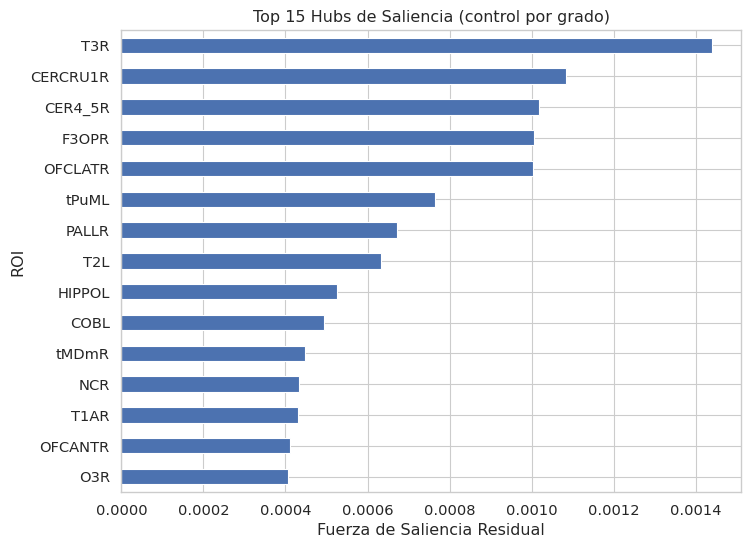

In [23]:

if 'df_hubs_robust200' in locals() and isinstance(df_hubs_robust200, pd.DataFrame):
    df_hubs_plot = df_hubs_robust200.sort_values('residual_strength', ascending=False).head(15)
    ax = df_hubs_plot.plot(kind='barh', x='node', y='residual_strength', figsize=(8,6), legend=False)
    ax.invert_yaxis()
    ax.set_xlabel('Fuerza de Saliencia Residual')
    ax.set_ylabel('ROI')
    ax.set_title('Top 15 Hubs de Saliencia (control por grado)')


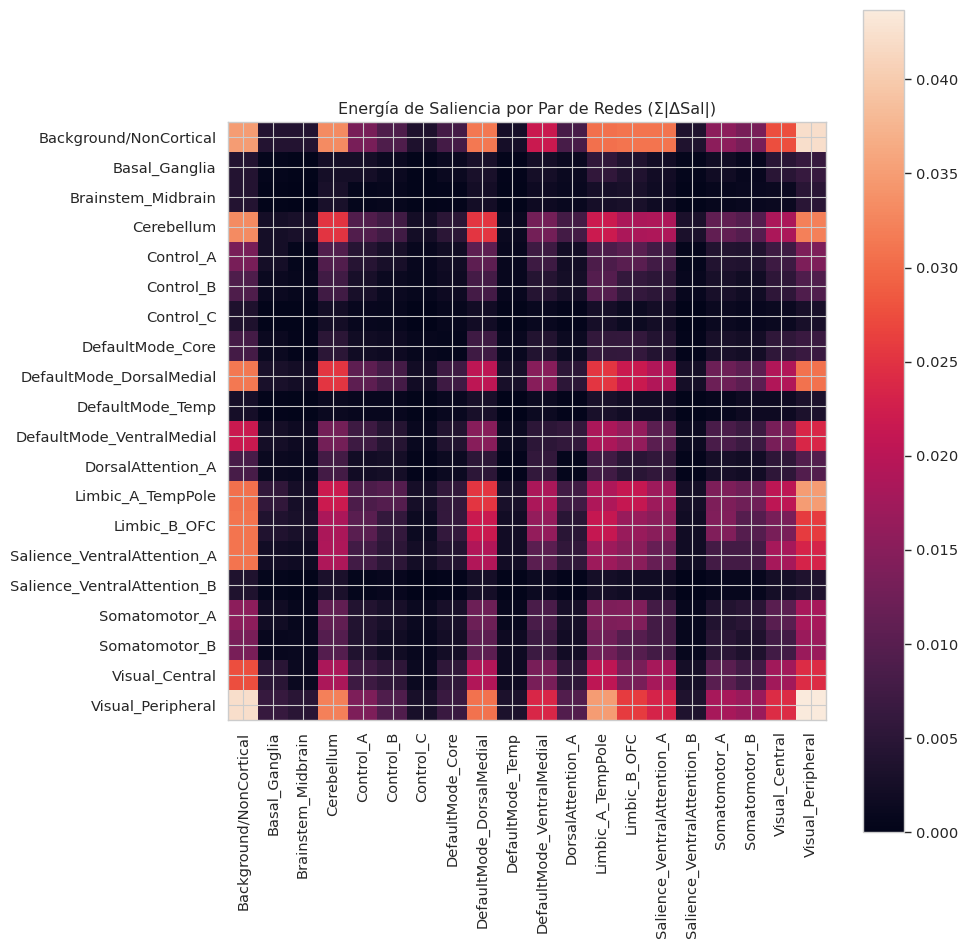

In [24]:

if 'df_net_pairs_abs' in locals() and isinstance(df_net_pairs_abs, pd.DataFrame):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.imshow(df_net_pairs_abs.values)
    plt.xticks(range(len(df_net_pairs_abs.columns)), df_net_pairs_abs.columns, rotation=90)
    plt.yticks(range(len(df_net_pairs_abs.index)), df_net_pairs_abs.index)
    plt.title('Energía de Saliencia por Par de Redes (Σ|ΔSal|)')
    plt.colorbar()
    plt.tight_layout()
    plt.show()



### 1.2. Top conexiones pro-AD y pro-CN


In [25]:

if 'df_edges' in locals():
    display_cols = ['Rank', 'src_AAL3_Name', 'dst_AAL3_Name', 'Saliency_Score', 'src_Refined_Network', 'dst_Refined_Network']
    print("--- Top 10 pro-AD (ΔS > 0) ---")
    display(df_edges[df_edges['Saliency_Score'] > 0].head(10)[display_cols])
    print("\n--- Top 10 pro-CN (ΔS < 0) ---")
    display(df_edges[df_edges['Saliency_Score'] < 0].head(10)[display_cols])


--- Top 10 pro-AD (ΔS > 0) ---


,Rank,src_AAL3_Name,dst_AAL3_Name,Saliency_Score,src_Refined_Network,dst_Refined_Network
0,1,OFCLATR,CERCRU1R,0.002129,DefaultMode_VentralMedial,Visual_Peripheral
1,2,OFCLATR,T3R,0.002114,DefaultMode_VentralMedial,Limbic_A_TempPole
6,7,OFCLATR,T2R,0.001375,DefaultMode_VentralMedial,DorsalAttention_A
9,10,OFCLATR,T2AL,0.001284,DefaultMode_VentralMedial,Limbic_A_TempPole
13,14,OFCLATR,CER10R,0.001202,DefaultMode_VentralMedial,Cerebellum
16,17,HESCHLR,VER7,0.001178,Somatomotor_B,Background/NonCortical
18,19,OFCLATR,GAR,0.001161,DefaultMode_VentralMedial,DefaultMode_DorsalMedial
20,21,CINML,VER7,0.001124,Salience_VentralAttention_A,Background/NonCortical
21,22,NLL,CERCRU1R,0.001115,Background/NonCortical,Visual_Peripheral
22,23,OFCANTR,OFCLATR,0.001109,Control_B,DefaultMode_VentralMedial



--- Top 10 pro-CN (ΔS < 0) ---


,Rank,src_AAL3_Name,dst_AAL3_Name,Saliency_Score,src_Refined_Network,dst_Refined_Network
2,3,F3OPR,GRR,-0.001692,Control_A,Limbic_B_OFC
3,4,CER4_5R,tPuML,-0.001603,Visual_Central,Background/NonCortical
4,5,GSMR,VER4_5,-0.001560,Salience_VentralAttention_A,Visual_Central
5,6,O3R,T1AR,-0.001383,Visual_Peripheral,Limbic_A_TempPole
7,8,PARA_HIPPOR,PALLR,-0.001370,Limbic_A_TempPole,Basal_Ganglia
8,9,GRL,T2L,-0.001331,Limbic_B_OFC,DefaultMode_VentralMedial
10,11,SMAR,FMOR,-0.001254,Somatomotor_A,DefaultMode_DorsalMedial
11,12,HIPPOL,PQL,-0.001222,DefaultMode_Core,DefaultMode_DorsalMedial
12,13,CER4_5R,tMDmR,-0.001208,Visual_Central,Background/NonCortical
14,15,SMAR,COBL,-0.001191,Somatomotor_A,Limbic_B_OFC



## Parte 2 — Validaciones y profundización estadística



### 2.1. Enriquecimiento por pares de redes (Top‑K)

Comparamos el conteo observado \(k\) de cada par red–red en el Top‑K vs. su disponibilidad \(M\) en la población total de aristas \(E\) (test hipergeométrico, FDR BH).


In [26]:

import pandas as pd, numpy as np, scipy.stats as st, pathlib

EDGE_CSV = IG_DIR / f"ranking_conexiones_ANOTADO{SUFFIX}.csv"
edges = pd.read_csv(EDGE_CSV)

net_src = 'src_Refined_Network' if 'src_Refined_Network' in edges.columns else 'src_Yeo17_Network'
net_dst = 'dst_Refined_Network' if 'dst_Refined_Network' in edges.columns else 'dst_Yeo17_Network'

def pair_label(a,b): 
    return '—'.join(sorted([str(a),str(b)]))

edges['pair'] = [pair_label(a,b) for a,b in zip(edges[net_src], edges[net_dst])]

def enrich_K(K):
    top = edges.nsmallest(K, 'Rank')
    E = len(edges)
    pop_counts = edges['pair'].value_counts()
    k_obs = top['pair'].value_counts()
    out = []
    for p, k in k_obs.items():
        M = pop_counts.get(p,0)
        N = K
        pval = st.hypergeom.sf(k-1, E, M, N)  # P(X>=k)
        out.append((p, k, M, E, N, pval))
    df = pd.DataFrame(out, columns=['pair','k_top','M_pop','E_total','N_top','pval']).sort_values('pval')
    m = len(df); ranks = np.arange(1, m+1)
    df['qval_BH'] = (df['pval'] * m / ranks).clip(upper=1).cummin()
    return df

for K in (50,100,200):
    dfk = enrich_K(K)
    display(dfk.head(10))
    dfk.to_csv(IG_DIR / f'enrichment_network_pairs_top{K}.csv', index=False)


,pair,k_top,M_pop,E_total,N_top,pval,qval_BH
5,DefaultMode_VentralMedial—DorsalAttention_A,2,18,8515,50,0.004869,0.185025
0,DefaultMode_VentralMedial—Visual_Peripheral,3,78,8515,50,0.010643,0.185025
6,DefaultMode_VentralMedial—Limbic_A_TempPole,2,60,8515,50,0.048197,0.185025
18,Brainstem_Midbrain—Cerebellum,1,11,8515,50,0.062764,0.185025
2,Background/NonCortical—Somatomotor_B,2,70,8515,50,0.063390,0.185025
29,DefaultMode_Temp—Visual_Peripheral,1,13,8515,50,0.073754,0.185025
22,Brainstem_Midbrain—Visual_Peripheral,1,13,8515,50,0.073754,0.185025
20,Background/NonCortical—Brainstem_Midbrain,1,14,8515,50,0.079201,0.185025
7,Background/NonCortical—DefaultMode_VentralMedial,2,84,8515,50,0.086941,0.185025
1,Background/NonCortical—Visual_Peripheral,3,182,8515,50,0.090823,0.185025


,pair,k_top,M_pop,E_total,N_top,pval,qval_BH
1,DefaultMode_VentralMedial—Limbic_A_TempPole,5,60,8515,100,0.000662,0.038377
0,Background/NonCortical—Salience_VentralAttenti...,6,112,8515,100,0.001980,0.038377
2,DefaultMode_VentralMedial—Visual_Peripheral,5,78,8515,100,0.002166,0.038377
22,DefaultMode_VentralMedial—DorsalAttention_A,2,18,8515,100,0.018486,0.038377
6,DefaultMode_VentralMedial—Limbic_B_OFC,3,72,8515,100,0.052393,0.038377
3,Limbic_A_TempPole—Visual_Peripheral,4,130,8515,100,0.066453,0.038377
41,Brainstem_Midbrain—DefaultMode_VentralMedial,1,6,8515,100,0.068447,0.038377
7,Background/NonCortical—DefaultMode_VentralMedial,3,84,8515,100,0.075823,0.038377
17,DefaultMode_VentralMedial—Salience_VentralAtte...,2,48,8515,100,0.108859,0.038377
37,Control_C—Limbic_A_TempPole,1,10,8515,100,0.111480,0.038377


,pair,k_top,M_pop,E_total,N_top,pval,qval_BH
0,DefaultMode_VentralMedial—Visual_Peripheral,8,78,8515,200,0.000462,0.042012
4,DefaultMode_VentralMedial—Limbic_A_TempPole,6,60,8515,200,0.002716,0.042012
3,Background/NonCortical—DefaultMode_VentralMedial,7,84,8515,200,0.003491,0.042012
2,Background/NonCortical—Salience_VentralAttenti...,8,112,8515,200,0.004757,0.042012
11,DefaultMode_VentralMedial—Visual_Central,5,54,8515,200,0.008463,0.042012
1,Limbic_A_TempPole—Visual_Peripheral,8,130,8515,200,0.011381,0.042012
8,Visual_Peripheral—Visual_Peripheral,5,78,8515,200,0.036109,0.042012
10,Somatomotor_A—Visual_Peripheral,5,91,8515,200,0.062605,0.042012
42,DefaultMode_VentralMedial—DorsalAttention_A,2,18,8515,200,0.065650,0.042012
21,DefaultMode_VentralMedial—Somatomotor_A,3,42,8515,200,0.075168,0.042012



### 2.2. ¿Saliencia = diferencia media? (|ΔSal| vs |d de Cohen|)

Calculamos \(d\) de Cohen por arista (promediando canales) en **test** y lo correlacionamos (Spearman) con \(|\Delta \mathcal{S}|\). Si la correlación es baja, la saliencia captura **patrones no triviales** más allá de grandes diferencias medias.


In [27]:

# --- Ajusta rutas si es necesario ---
GLOBAL_TENSOR_PATH = '/home/diego/Escritorio/limpio/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz'
METADATA_PATH = '/home/diego/Escritorio/limpio/SubjectsData_AAL3_procesado2.csv'
RUN_DIR_STR = './resultados67'
FOLD_INT = 1
CHANNELS_TO_USE = [1,2,4,5]

import numpy as np, pandas as pd
from scipy.stats import spearmanr

def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    if pooled_std == 0:
        return 0.0
    return (np.mean(x) - np.mean(y)) / pooled_std

try:
    npz_data = np.load(GLOBAL_TENSOR_PATH)
    tensor_all = npz_data['global_tensor_data']
    subj_all_ids = npz_data['subject_ids'].astype(str)
    meta_df = pd.read_csv(METADATA_PATH)
    meta_df['SubjectID'] = meta_df['SubjectID'].astype(str).str.strip()

    fold_dir = f"{RUN_DIR_STR}/fold_{FOLD_INT}"
    test_indices_in_cnad_df = np.load(f"{fold_dir}/test_indices.npy")

    tensor_df = pd.DataFrame({'SubjectID': subj_all_ids, 'tensor_idx': np.arange(len(subj_all_ids))})
    merged = tensor_df.merge(meta_df, on='SubjectID', how='left')
    cnad_df = merged[merged['ResearchGroup_Mapped'].isin(['CN', 'AD'])].reset_index(drop=True)

    test_df = cnad_df.iloc[test_indices_in_cnad_df]
    gidx_test_ad = test_df[test_df['ResearchGroup_Mapped'] == 'AD']['tensor_idx'].values
    gidx_test_cn = test_df[test_df['ResearchGroup_Mapped'] == 'CN']['tensor_idx'].values

    tensor_test_ad = tensor_all[gidx_test_ad][:, CHANNELS_TO_USE, :, :].mean(axis=1)
    tensor_test_cn = tensor_all[gidx_test_cn][:, CHANNELS_TO_USE, :, :].mean(axis=1)

    # Calcular d de Cohen para cada arista del ranking (mismo orden que df_edges)
    cohen_ds = []
    for _, row in df_edges.iterrows():
        i, j = int(row['idx_i']), int(row['idx_j'])
        conn_ad = tensor_test_ad[:, i, j]
        conn_cn = tensor_test_cn[:, i, j]
        d = cohen_d(conn_ad, conn_cn)
        cohen_ds.append(d)
    df_edges['cohen_d'] = cohen_ds
    df_edges['abs_cohen_d'] = np.abs(df_edges['cohen_d'])
    df_edges['abs_saliency'] = df_edges['Saliency_Score'].abs()

    rho, pval = spearmanr(df_edges['abs_saliency'], df_edges['abs_cohen_d'])
    print(f"Spearman ρ(|ΔSal|, |d|) = {rho:.3f}  (p={pval:.3e})")
except FileNotFoundError as e:
    print("Omitiendo cálculo de d de Cohen por falta de archivos:", e)


Spearman ρ(|ΔSal|, |d|) = 0.161  (p=1.151e-50)


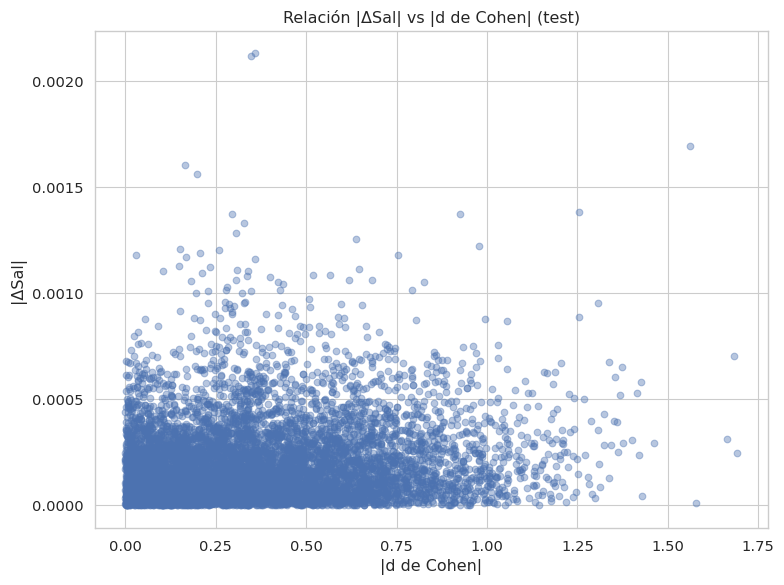

In [28]:

# Visualización simple (scatter)
import matplotlib.pyplot as plt
if 'abs_cohen_d' in df_edges.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df_edges['abs_cohen_d'], df_edges['abs_saliency'], alpha=0.4)
    plt.xlabel('|d de Cohen|')
    plt.ylabel('|ΔSal|')
    plt.title('Relación |ΔSal| vs |d de Cohen| (test)')
    plt.tight_layout()
    plt.show()



### 2.3. Contribución por canal y lateralidad


   channel_index_used                 channel_name   l1_norm  l1_norm_fraction
0                   1  Pearson_Full_FisherZ_Signed  5.033197          0.286748
1                   2             MI_KNN_Symmetric  4.388445          0.250015
2                   4                   dFC_StdDev  5.121708          0.291790
3                   5                 DistanceCorr  3.009366          0.171447


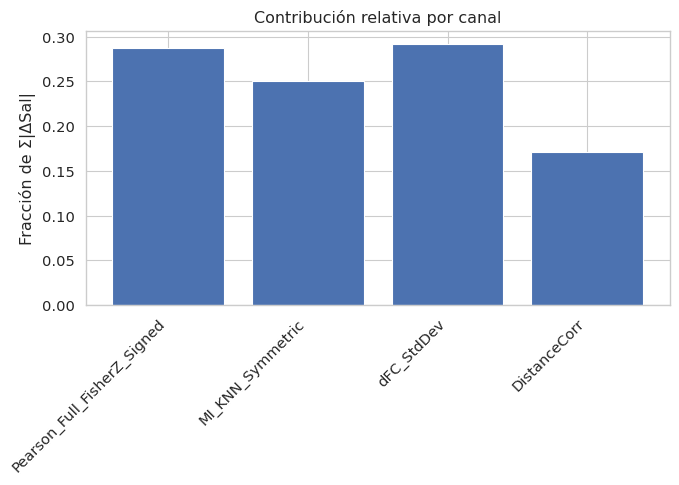

In [29]:

# Barras / pie de contribución por canal
import pandas as pd, matplotlib.pyplot as plt

if 'df_channels' in locals():
    print(df_channels)
    fig = plt.figure(figsize=(7,5))
    plt.bar(range(len(df_channels)), df_channels['l1_norm_fraction'])
    plt.xticks(range(len(df_channels)), df_channels['channel_name'], rotation=45, ha='right')
    plt.ylabel('Fracción de Σ|ΔSal|')
    plt.title('Contribución relativa por canal')
    plt.tight_layout()
    plt.show()


In [30]:

# Lateralidad (binomial R-R vs L-L en Top-K)
import re, pandas as pd
from scipy.stats import binomtest

edges = pd.read_csv(IG_DIR / f"ranking_conexiones_ANOTADO{SUFFIX}.csv")

def hemi(name):
    s = str(name)
    if s.endswith('L'): return 'L'
    if s.endswith('R'): return 'R'
    m = re.search(r'_(L|R)$', s)
    return m.group(1) if m else 'U'

edges['hemi_src'] = edges['src_AAL3_Name'].map(hemi)
edges['hemi_dst'] = edges['dst_AAL3_Name'].map(hemi)

def lat_counts(K):
    top = edges.nsmallest(K, 'Rank').copy()
    cats = {'R-R':0,'L-L':0,'R-L':0,'L-R':0,'U':0}
    for _,r in top.iterrows():
        a,b = r['hemi_src'], r['hemi_dst']
        if a in 'LR' and b in 'LR':
            if a==b=='R': cats['R-R']+=1
            elif a==b=='L': cats['L-L']+=1
            elif a!=b and a=='R': cats['R-L']+=1
            elif a!=b and a=='L': cats['L-R']+=1
        else:
            cats['U']+=1
    n_rr = cats['R-R']; n_ll = cats['L-L']
    denom = max(n_rr+n_ll, 1)
    pval = binomtest(n_rr, denom, 0.5, alternative='greater').pvalue
    return pd.Series({**cats, 'n_total_sided': denom + cats['R-L'] + cats['L-R'], 'p_binom_R> L': pval})

for K in (50,100,200):
    print(f'Top-{K}')
    display(lat_counts(K))


Top-50


R-R              29.000000
L-L               6.000000
R-L               6.000000
L-R               4.000000
U                 5.000000
n_total_sided    45.000000
p_binom_R> L      0.000058
dtype: float64

Top-100


R-R              5.100000e+01
L-L              9.000000e+00
R-L              1.400000e+01
L-R              1.300000e+01
U                1.300000e+01
n_total_sided    8.700000e+01
p_binom_R> L     1.542518e-08
dtype: float64

Top-200


R-R              8.100000e+01
L-L              2.300000e+01
R-L              4.200000e+01
L-R              2.600000e+01
U                2.800000e+01
n_total_sided    1.720000e+02
p_binom_R> L     4.672351e-09
dtype: float64


## Métodos (resumen)

**Datos y particiones.** Un conectoma por sujeto con \(C\) canales y \(R\) ROIs. Canales seleccionados: *Pearson_Full_FisherZ_Signed*, *MI_KNN_Symmetric*, *dFC_StdDev*, *DistanceCorr*. Clasificación AD vs CN (N=184; CN=89, AD=95). CV externa en \(K\) folds estratificada por *ResearchGroup_Mapped*, *Sex*, *Manufacturer*. En el Fold 1, test N=37 (AD=19, CN=18). El VAE se entrena con AD, CN y MCI (N=394).

**Normalización inter‑canal.** `zscore_offdiag` por canal usando sólo el *train* del VAE (sin leakage).

**VAE (encoder–decoder).** 4 bloques conv. + FC con dropout y layer norm en FC; dimensión latente \(K=48\). Pérdida \(\beta\)-VAE con scheduler cíclico y *CosineAnnealingWarmRestarts*; *early stopping* en validación interna.

**Clasificador y SHAP.** Features \(x'=[\mu, m]\). Modelos (XGB, SVM, LogReg, LGBM‑GB, GB de sklearn), búsqueda bayesiana/Optuna en *train/dev* (5‑fold interna), *scoring* AUC‑ROC, calibración si aplica. Con SHAP, definimos \(w_k=\overline{\phi(\mu_k)}_{\text{AD}}-\overline{\phi(\mu_k)}_{\text{CN}}\) y el escalar \(S(x)=w^\top\mu(x)\).

**IG a conexiones.** IG de \(S\circ E_\mu\) con baseline nula por canal; agregación por ROI–ROI y promedio de absolutos por grupo \(\Rightarrow \Delta \mathcal{S}\).

**Controles.** (i) Sin leakage (normalización y SHAP background sólo con *train*); (ii) efectos de sitio (estratificación por Manufacturer; *stress test* ΔAUC por permutación; LOSO por fabricante recomendable en suplementos); (iii) robustez de IG (randomización de pesos); (iv) ablaciones (sin metadatos, sólo Pearson, \(\mu\) vs \(z\), \(\beta\) y dropout); (v) estadística por red con FDR.
